In [1]:
import quandl
import numpy as np
import pandas as pd
import talib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from statistics import mean, stdev
from collections import Counter
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn import metrics
from scipy import stats
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, plot
import plotly
import plotly.io as pio
import os
from sklearn.preprocessing import scale
from random import seed
from random import random
from pandas_ml import ConfusionMatrix

//anaconda/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
SOXL = pd.read_csv('soxl_new.csv') #ETF growth cycle
Nasdaq = pd.read_csv('nasdaq_new.csv') #Index
TQQQ = pd.read_csv('tqqq_new.csv') #3X Index
MU = pd.read_csv('mu_new.csv') #high Beta
AMD = pd.read_csv('amd_new.csv') # high beta
NFLX = pd.read_csv('nflx_new.csv') #High growth
AMZN = pd.read_csv('amzn_new.csv') #High growth
V = pd.read_csv('visa_new.csv') #low volalitity
YINN = pd.read_csv('yinn_new.csv') #looks like bell curve
NVDA = pd.read_csv('nvda_new.csv') #high growth
WTW = pd.read_csv('wtw_new.csv') #high beta
F = pd.read_csv('f_new.csv') #highly traded
MSFT = pd.read_csv('mfst_new.csv') #high traded
HNGR = pd.read_csv('hngr_new.csv') #high beta cyclic




stocks = [SOXL, Nasdaq, TQQQ, MU, AMD, NFLX, AMZN, V, YINN, NVDA, WTW, F, MSFT, HNGR]

In [3]:
features = ['Day_previous_roi','ma10','rsi10','ma20','rsi20','ma_chg20',
            'ma60','rsi60','ma200','rsi200','obv','macd_diff','ma_chg10',
            'macd_diff_hist','aroon_diff','slope60','r_sqr_60','ma_chg60',
            'slope10','r_sqr_10','slope5','r_sqr_5','stDev20','ma_chg200',
            'rsi_chg10','rsi_chg20','rsi_chg60','rsi_chg200',
            'percent_down','sine','leadsine','tsf10','tsf20','tsf60','tsf200',
            'up_dwn_prev','shawman','hammer','semi_pk_pr','open_H_ratio',
            'open_L_ratio','close_H_ratio','close_L_ratio']
features_2 = ['Day_previous_roi','ma10','rsi10','ma20','rsi20',
            'ma60','rsi60','ma200','rsi200','obv','macd_diff',
            'macd_diff_hist','aroon_diff','slope60','r_sqr_60',
            'slope10','r_sqr_10','slope5','r_sqr_5',
            'percent_down','sine','leadsine','tsf10','tsf20','tsf60','tsf200',
            'open_H_ratio',
            'open_L_ratio','close_H_ratio','close_L_ratio']
feats = ['r_sqr_60',            
         'tsf60',               
         'macd_diff',           
         'percent_down',        
         'obv',                 
         'slope10',             
         'rsi60',               
         'rsi20',               
         'rsi200',
         'ma200',              
         'macd_diff_hist',      
         'slope60',             
         'tsf200']

In [4]:
SOXL.name = 'soxl'.upper()
Nasdaq.name = 'nasdaq'.upper()
TQQQ.name = 'tqqq'.upper()   
MU.name = 'mu'.upper()
AMD.name = 'amd'.upper()
NFLX.name = 'nflx'.upper()
AMZN.name = 'amzn'.upper()
V.name =  'visa'.upper()
YINN.name = 'yinn'.upper()
NVDA.name = 'nvda'.upper()
WTW.name = 'wtw'.upper()
F.name = 'f'.upper()
MSFT.name = 'mfst'.upper()
HNGR.name = 'hngr'.upper()




In [5]:
df_cln = TQQQ
name = df_cln.name
target_name = 'tar_1best_class'
#.75 make a 25/75 split
stop = round(.8*len(df_cln))

#set features

feature_train = df_cln.loc[:stop,features_2]
feature_test = df_cln.loc[stop:,features_2]
    
#set my targets

target_train = df_cln.loc[:stop,[target_name]]
target_test = df_cln.loc[stop:,[target_name]]
    
rf2 = RandomForestClassifier(n_estimators=900,
                             random_state=42,
                             n_jobs=-1,
                             max_features=5,
                             max_depth=13,
                             criterion="gini",
                             warm_start=True )

# Train the classifier
rf2.fit(feature_train, target_train)


feature_imp = pd.Series(rf2.feature_importances_,index=features_2).sort_values(ascending=False)
print(feature_imp)
# prediction on test set
target_pred=rf2.predict(feature_test)
target_pred2=rf2.predict(feature_train)

# #Import scikit-learn metrics module for accuracy calculation
# from sklearn import metrics
# # Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(target_test, target_pred),'\n'
      'Cohans Kappa:', metrics.cohen_kappa_score(target_test, target_pred),'\n'
      'Train ACC:', metrics.accuracy_score(target_train, target_pred2), '\n'
      "Confusion Matrix:",metrics.confusion_matrix(target_test, target_pred))



//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:26: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



rsi20               0.043050
tsf200              0.038488
rsi10               0.037300
ma60                0.036701
ma20                0.035518
close_H_ratio       0.035453
rsi60               0.035301
rsi200              0.035257
Day_previous_roi    0.034791
percent_down        0.034329
open_L_ratio        0.034142
close_L_ratio       0.033863
macd_diff_hist      0.033141
r_sqr_5             0.033128
open_H_ratio        0.033025
r_sqr_10            0.033019
ma200               0.032882
obv                 0.032480
slope60             0.032297
ma10                0.032124
leadsine            0.032095
slope5              0.031640
slope10             0.031636
tsf20               0.031297
tsf60               0.031205
sine                0.031185
macd_diff           0.031131
r_sqr_60            0.030728
tsf10               0.030680
aroon_diff          0.022112
dtype: float64
Accuracy: 0.3676092544987147 
Cohans Kappa: 0.14454287834225787 
Train ACC: 1.0 
Confusion Matrix: [[27 11  9 64]
 

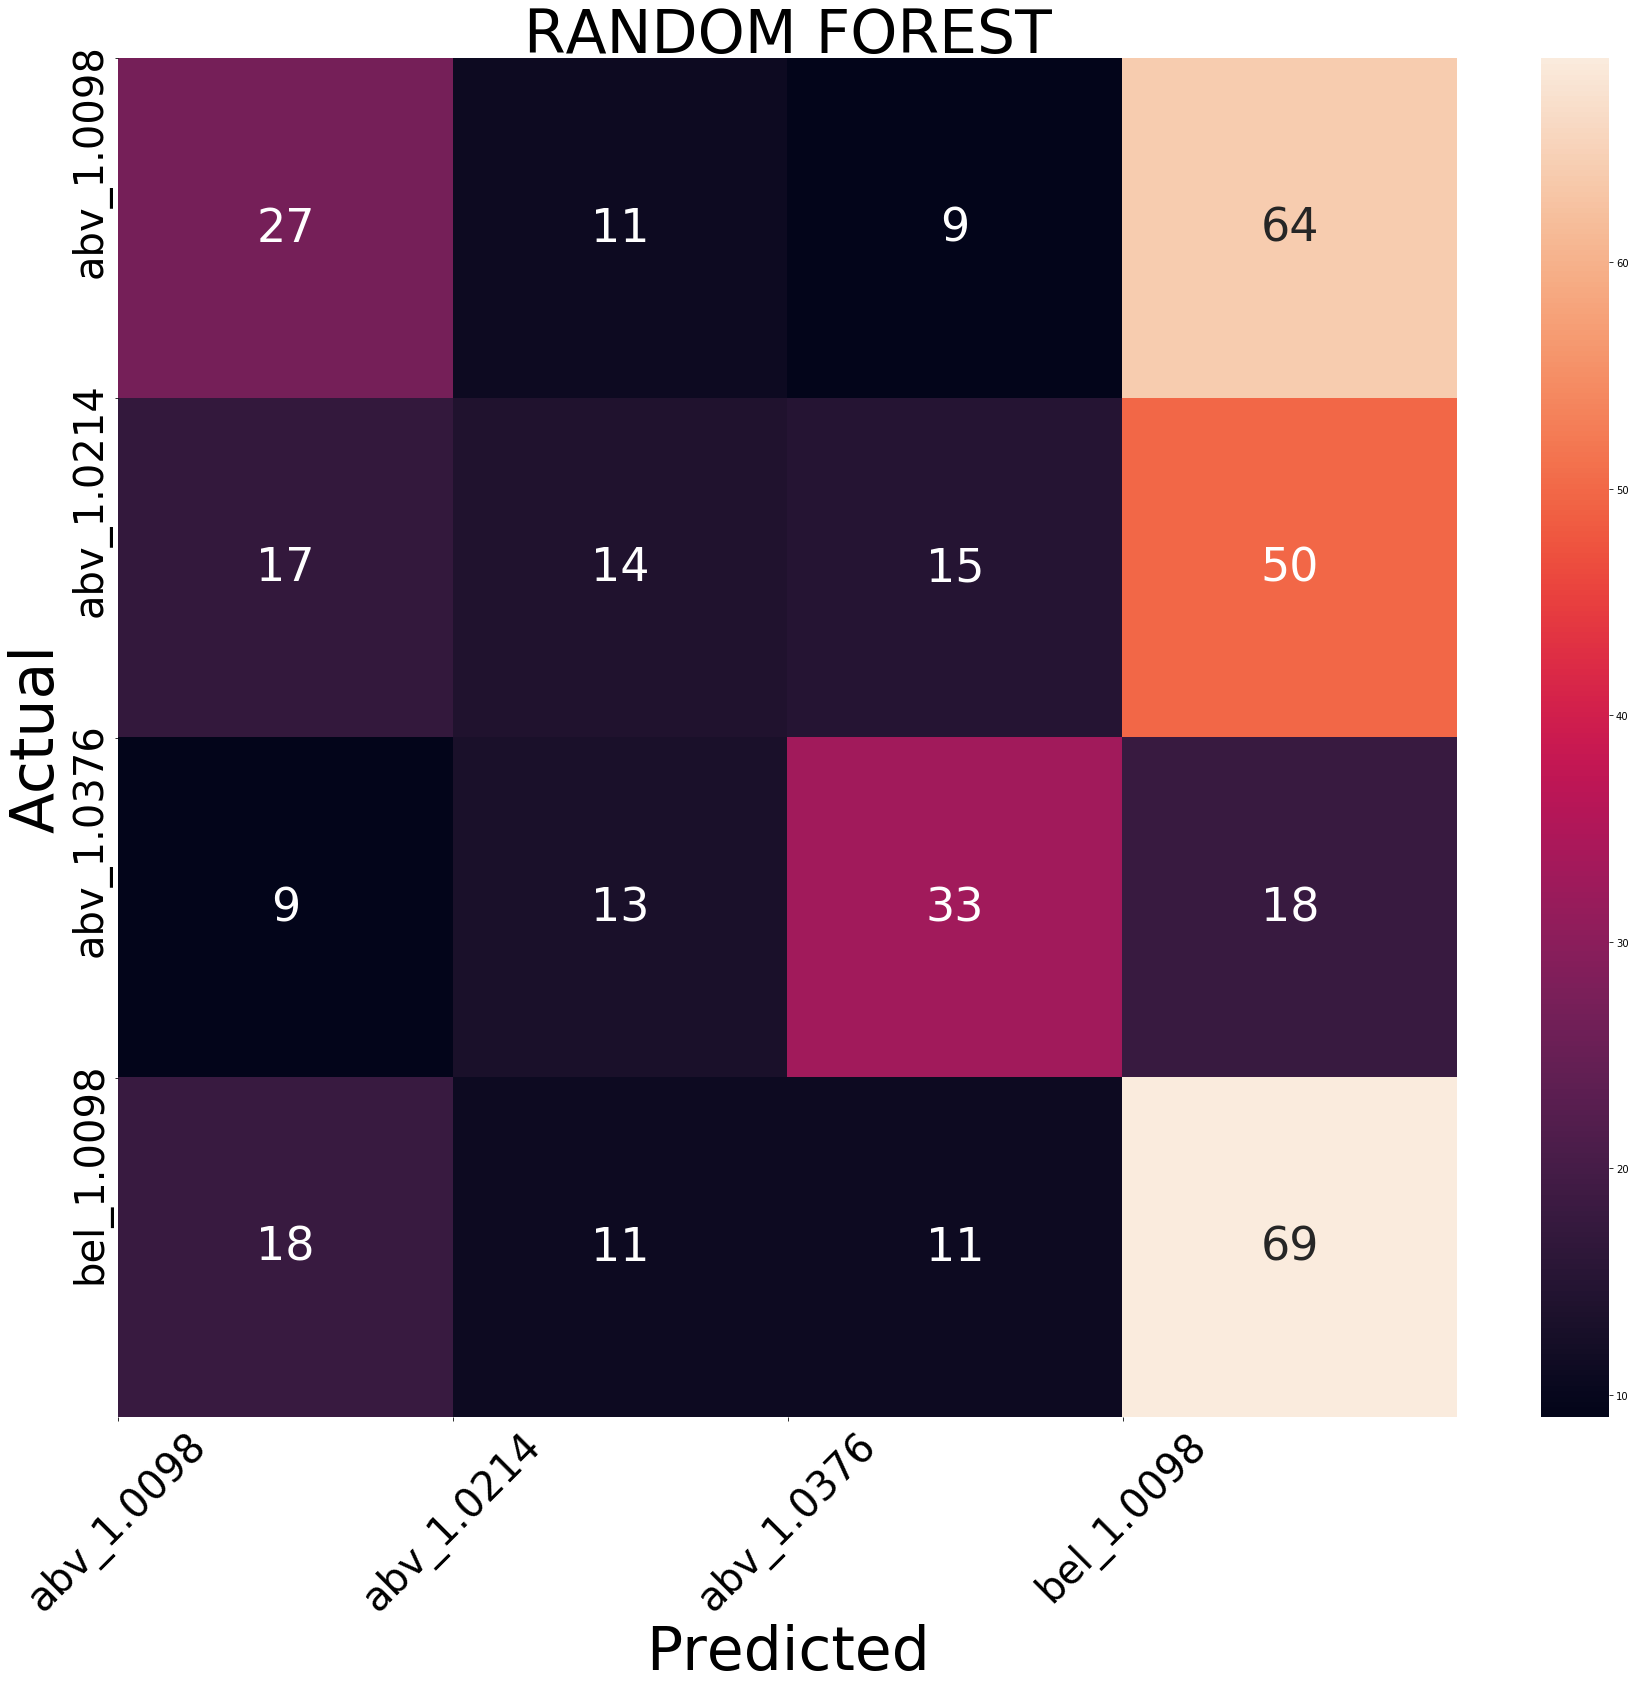

In [6]:
tar_true = target_test[target_name].values.tolist()

confusion_matrix = ConfusionMatrix(tar_true,target_pred)
matrix = metrics.confusion_matrix(target_test, target_pred)
type(confusion_matrix)
plt.subplots(figsize=(30,25))

ax =sns.heatmap(matrix, annot=True,annot_kws={"size": 46},fmt="d")# font size
tick_marks = np.arange(len(confusion_matrix.classes.values))
plt.xticks(tick_marks, confusion_matrix.classes.values, rotation=45, fontsize=40)
plt.yticks(tick_marks, confusion_matrix.classes.values, fontsize=40)
plt.xlabel( confusion_matrix.pred_name, fontsize=60)
plt.ylabel( confusion_matrix.true_name, fontsize=60)
plt.title('RANDOM FOREST', fontsize=60)

//anaconda/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



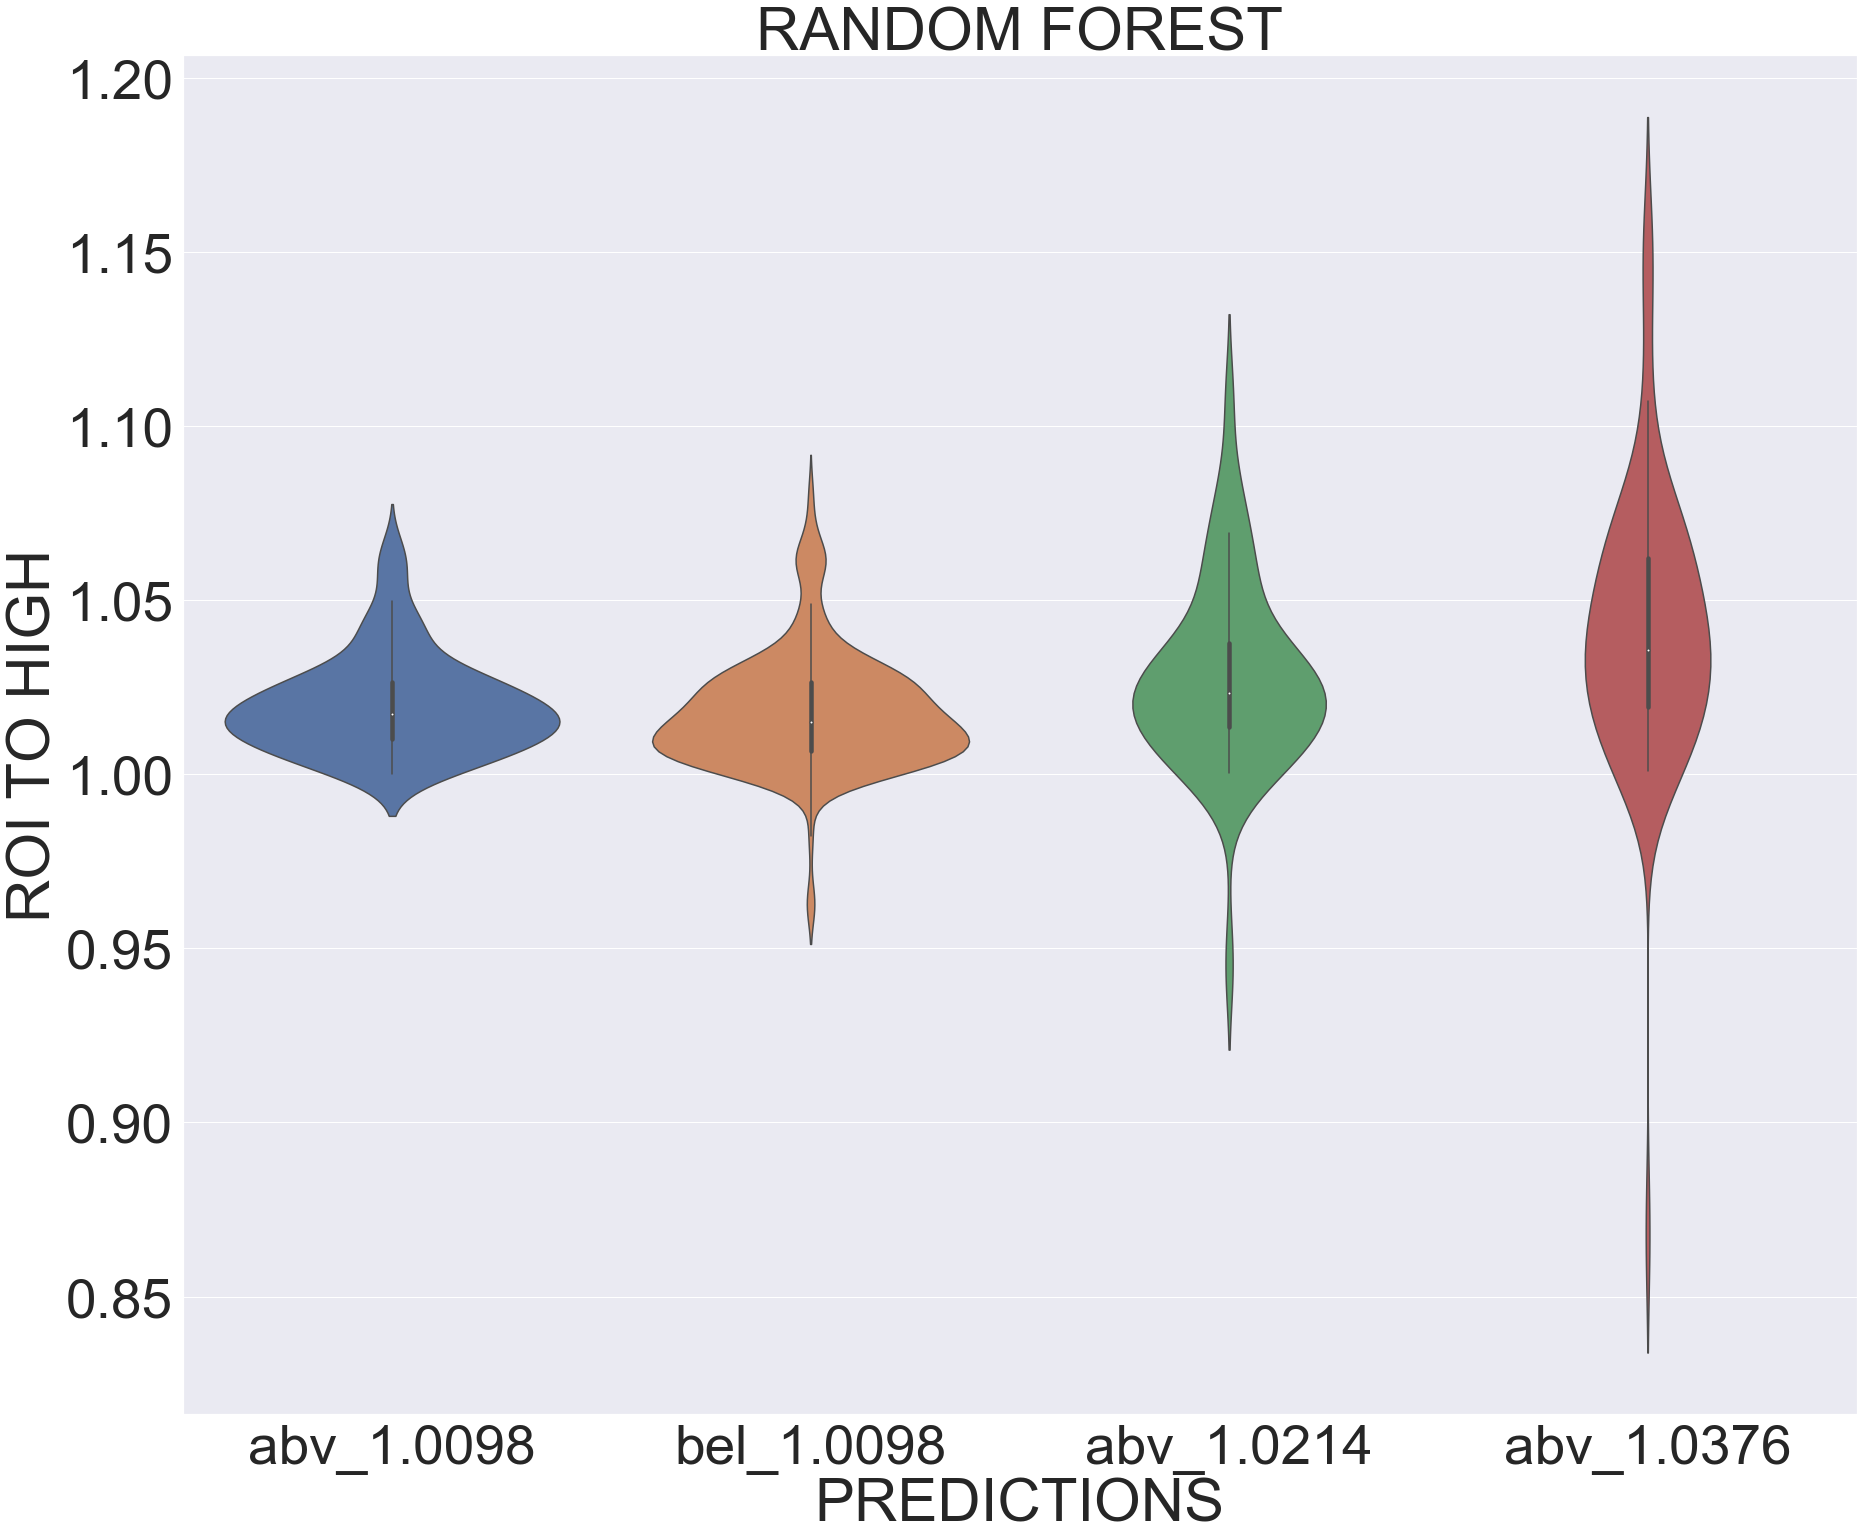

In [7]:
df_test = df_cln.loc[stop:,]
df_test.reset_index(inplace=True)
target_pred=pd.DataFrame(rf2.predict(feature_test),columns=['prediction'])
model_test = df_test.merge(target_pred,
                              left_index=True,
                              right_index=True)


sns.set(font_scale=5)
plt.subplots(figsize=(30,25))
plt.title('RANDOM FOREST', fontsize=60);
#sns.set(style="whitegrid")
ax = sns.violinplot(x="prediction", y="tar_1best_roi", data=model_test)
#ax = sns.violinplot(y='current_roi', data=model_test,palette="Set1")
ax.set_xlabel('PREDICTIONS',fontsize=60);
ax.set_ylabel('ROI TO HIGH',fontsize=60);


In [8]:
df_test.head()

level_0  Unnamed: 0  index        Date       Open       High        Low  \
0     1557        1557   1758  2017-02-06  25.043333  25.273333  24.976667   
1     1558        1558   1759  2017-02-07  25.393333  25.696667  25.353333   
2     1559        1559   1760  2017-02-08  25.430000  25.763334  25.290001   
3     1560        1560   1761  2017-02-09  25.733334  26.110001  25.693333   
4     1561        1561   1762  2017-02-10  26.110001  26.299999  25.976667   

       Close  Adj Close   Volume            ...             tar_3best_class  \
0  25.260000  25.260000  5213400            ...                  abv_1.0334   
1  25.520000  25.520000  5829300            ...                  abv_1.0334   
2  25.663334  25.663334  4620900            ...                  abv_1.0334   
3  25.930000  25.930000  6440700            ...                  abv_1.0334   
4  26.186666  26.186666  5984100            ...                  abv_1.0334   

   tar_5best_class  tar_10best_class  tar_20best_class  easy_buy  \
0       abv_1.0432        abv_1.1061        abv_1.0989       buy   
1       abv_1.0758        abv_1.1061        abv_1.0989       buy   
2       abv_1.0432        abv_1.0635        abv_1.0989       buy   
3       abv_1.0432        abv_1.0635        abv_1.0989       buy   
4       abv_1.0432        abv_1.0635        abv_1.0508       buy   

             tar_1new_high             tar_3new_high            tar_5new_high  \
0  below_1.021376652840762  above_1.0333975105009776  above_1.043168663342859   
1  above_1.021376652840762  above_1.0333975105009776  above_1.043168663342859   
2  above_1.021376652840762  above_1.0333975105009776  above_1.043168663342859   
3  above_1.021376652840762  above_1.0333975105009776  above_1.043168663342859   
4  below_1.021376652840762  above_1.0333975105009776  above_1.043168663342859   

             tar_10new_high            tar_20new_high  
0  above_1.0635327545968982  above_1.0988917597843018  
1  above_1.0635327545968982  above_1.0988917597843018  
2  above_1.0635327545968982  above_1.0988917597843018  
3  above_1.0635327545968982  above_1.0988917597843018  
4  above_1.0635327545968982  below_1.0988917597843018  

[5 rows x 83 columns]

In [9]:

    
adaB = AdaBoostClassifier(RandomForestClassifier(
                             n_estimators=1100,
                             random_state=42,
                             n_jobs=-1,
                             max_features=4,
                             max_depth=10,
                             criterion="gini"),
                         n_estimators=1000,
                         random_state=42,
                         learning_rate=1)

# Train the classifier
adaB.fit(feature_train, target_train)

# prediction on test set
target_pred=adaB.predict(feature_test)
target_pred2=adaB.predict(feature_train)

# #Import scikit-learn metrics module for accuracy calculation
# from sklearn import metrics
# # Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(target_test, target_pred),'\n'
      'Cohans Kappa:', metrics.cohen_kappa_score(target_test, target_pred),'\n'
      'Train ACC:', metrics.accuracy_score(target_train, target_pred2), '\n'
      "Confusion Matrix:",metrics.confusion_matrix(target_test, target_pred))




//anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:578: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Accuracy: 0.34704370179948585 
Cohans Kappa: 0.11666785867543983 
Train ACC: 0.9980744544287549 
Confusion Matrix: [[22 15  7 67]
 [13 16 16 51]
 [ 7 17 29 20]
 [19 10 12 68]]


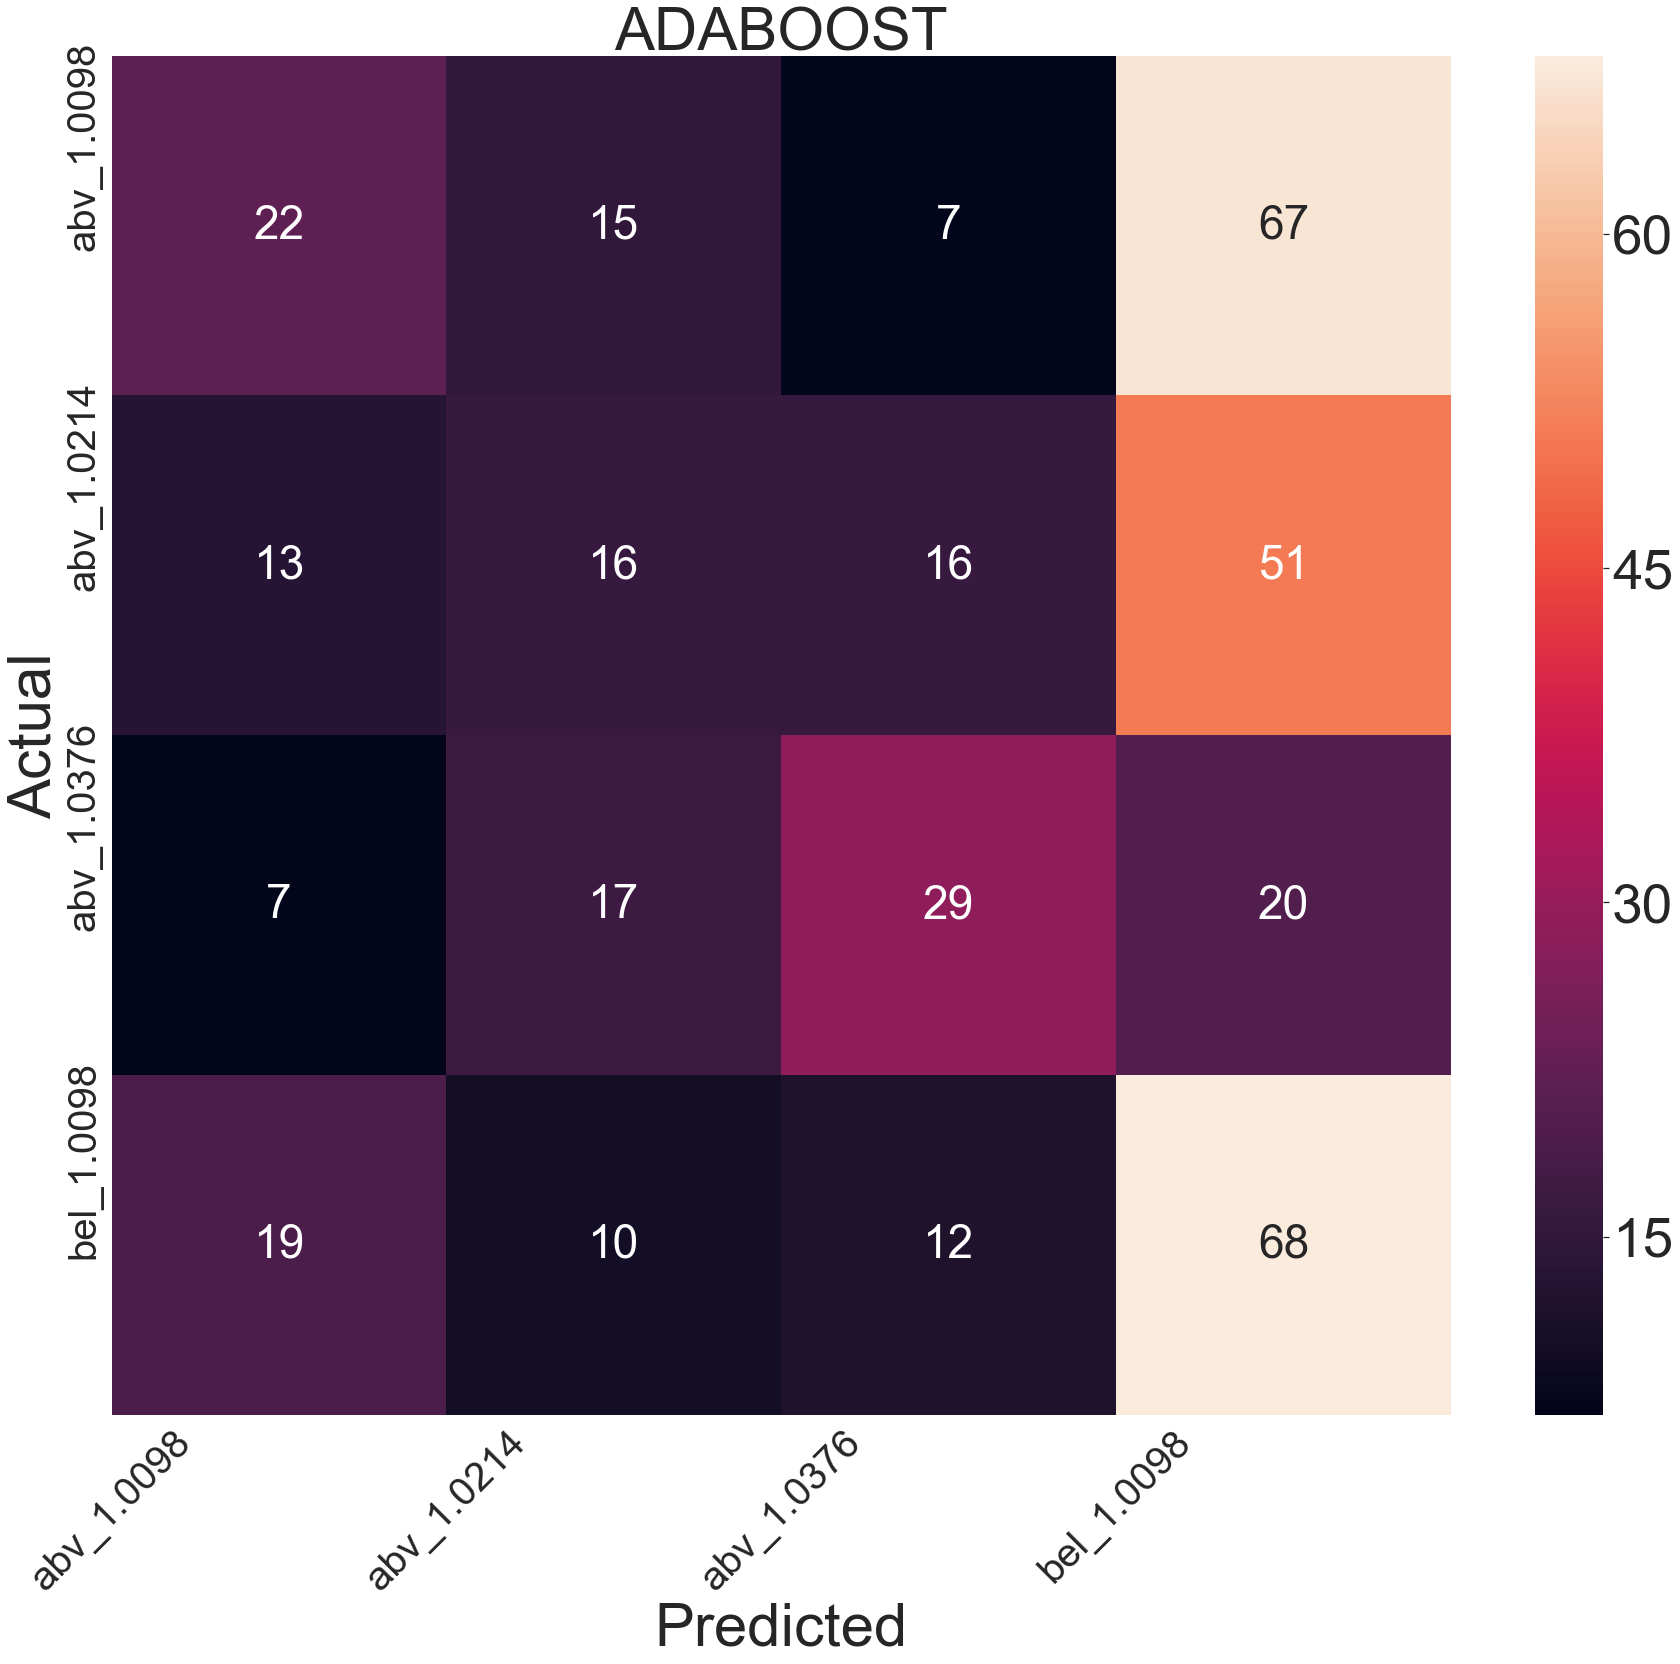

In [10]:
tar_true = target_test[target_name].values.tolist()

confusion_matrix = ConfusionMatrix(tar_true,target_pred)
matrix = metrics.confusion_matrix(target_test, target_pred)
type(confusion_matrix)
plt.subplots(figsize=(30,25))

ax =sns.heatmap(matrix, annot=True,annot_kws={"size": 46},fmt="d")# font size
tick_marks = np.arange(len(confusion_matrix.classes.values))
plt.xticks(tick_marks, confusion_matrix.classes.values, rotation=45, fontsize=40)
plt.yticks(tick_marks, confusion_matrix.classes.values, fontsize=40)
plt.xlabel( confusion_matrix.pred_name, fontsize=60)
plt.ylabel( confusion_matrix.true_name, fontsize=60)
plt.title('ADABOOST', fontsize=60)

//anaconda/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



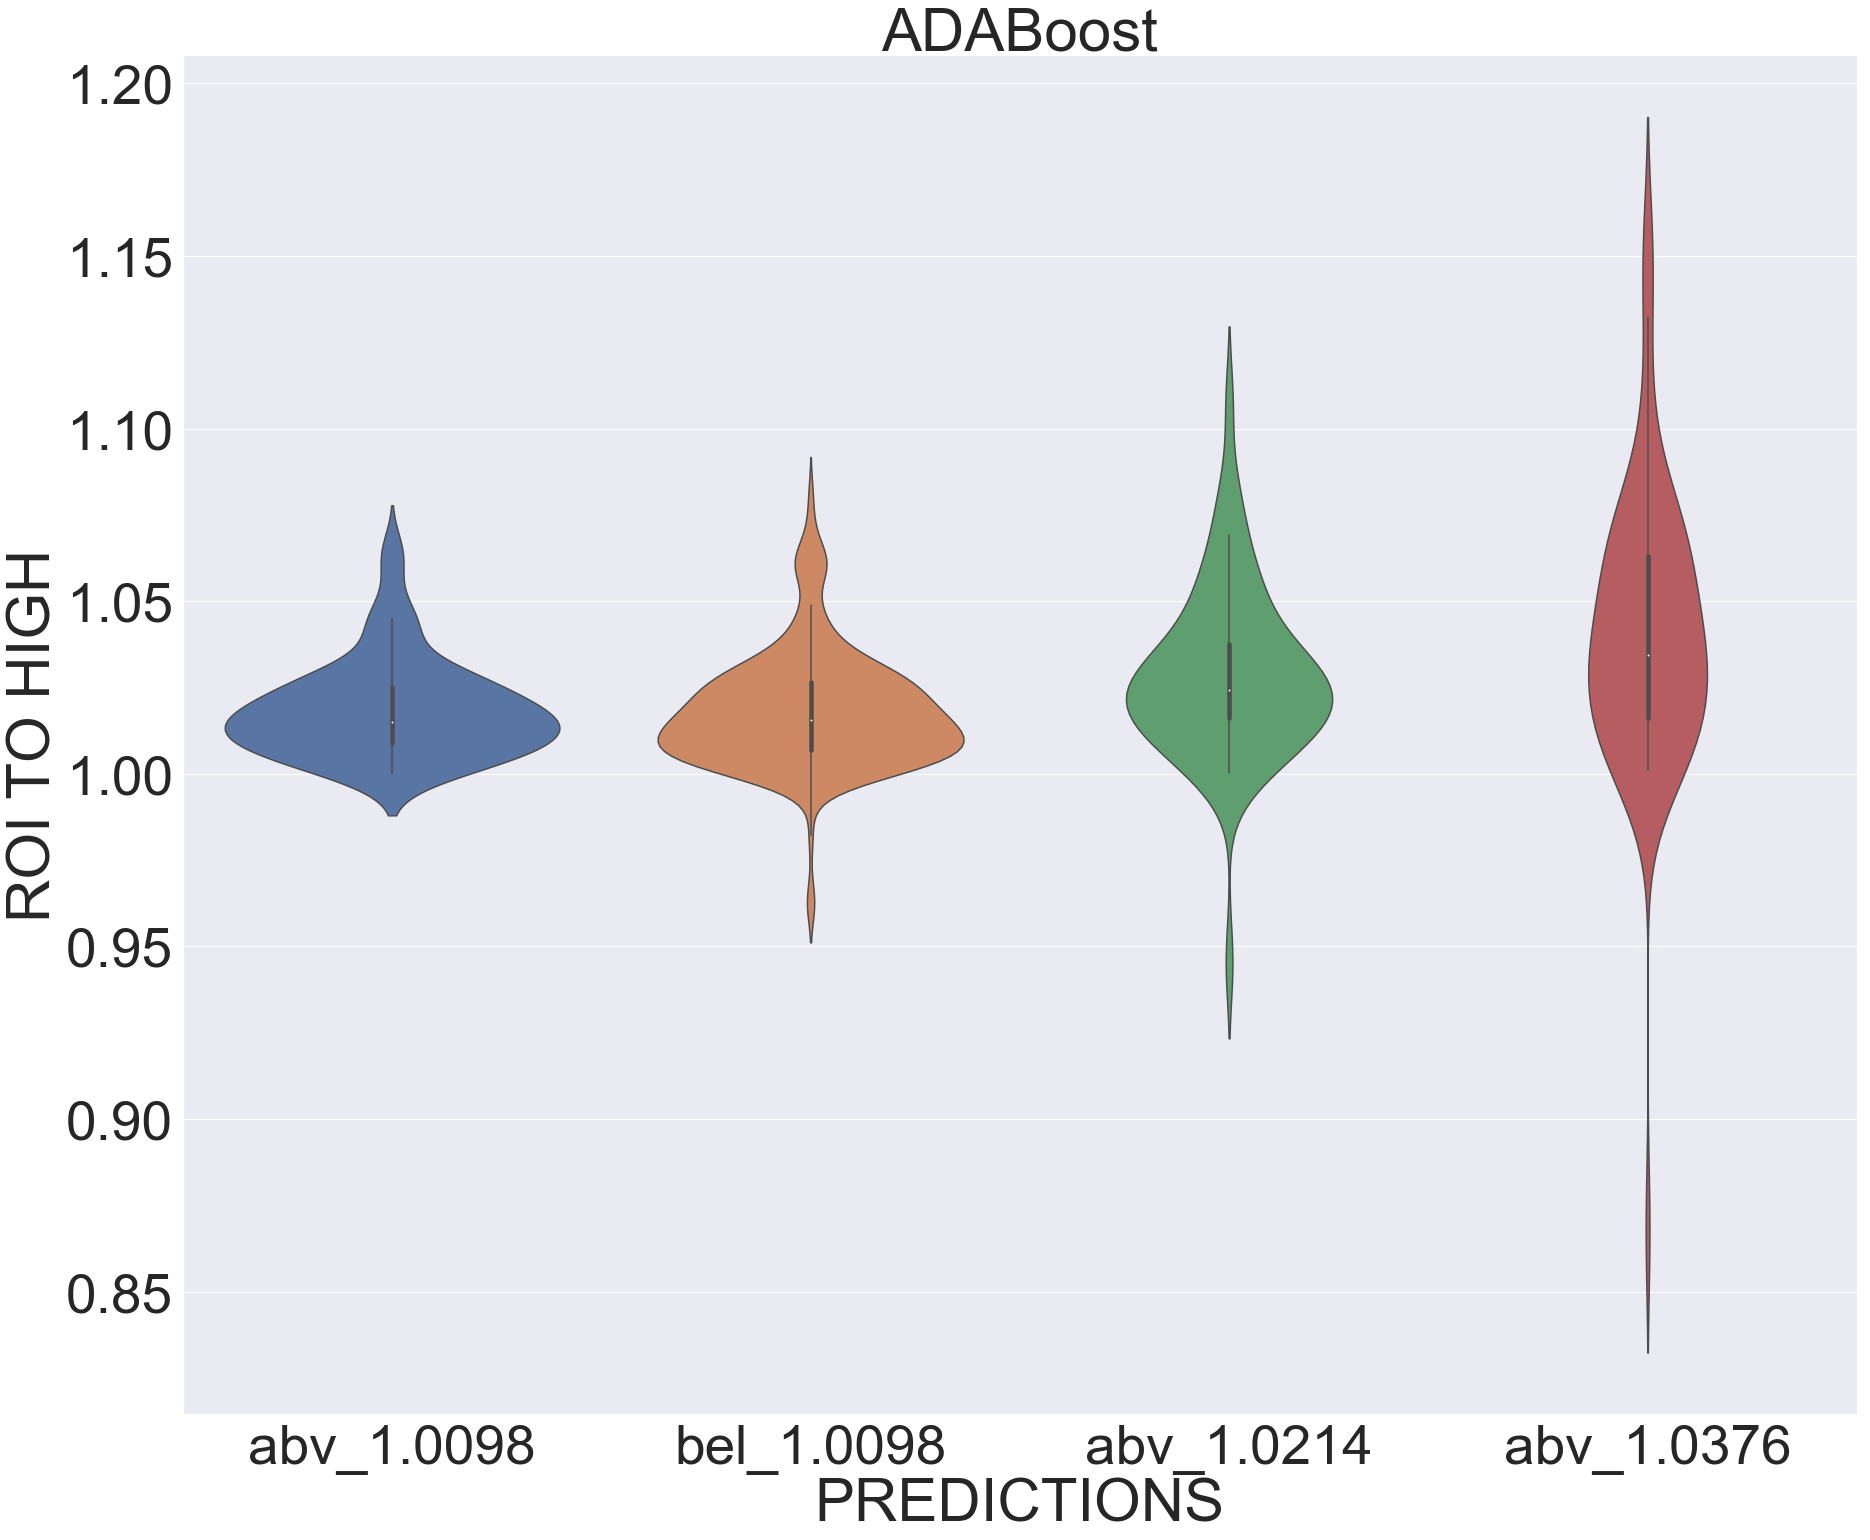

In [11]:
df_test = df_cln.loc[stop:,]
df_test.reset_index(inplace=True)
target_pred=pd.DataFrame(adaB.predict(feature_test),columns=['prediction'])
model_test = df_test.merge(target_pred,
                              left_index=True,
                              right_index=True)


sns.set(font_scale=5)
plt.subplots(figsize=(30,25))
plt.title('ADABoost', fontsize=60);
#sns.set(style="whitegrid")
ax = sns.violinplot(x="prediction", y="tar_1best_roi", data=model_test)

#ax = sns.violinplot(y='current_roi', data=model_test,palette="Set1")
ax.set_xlabel('PREDICTIONS',fontsize=60);
ax.set_ylabel('ROI TO HIGH',fontsize=60);

//anaconda/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



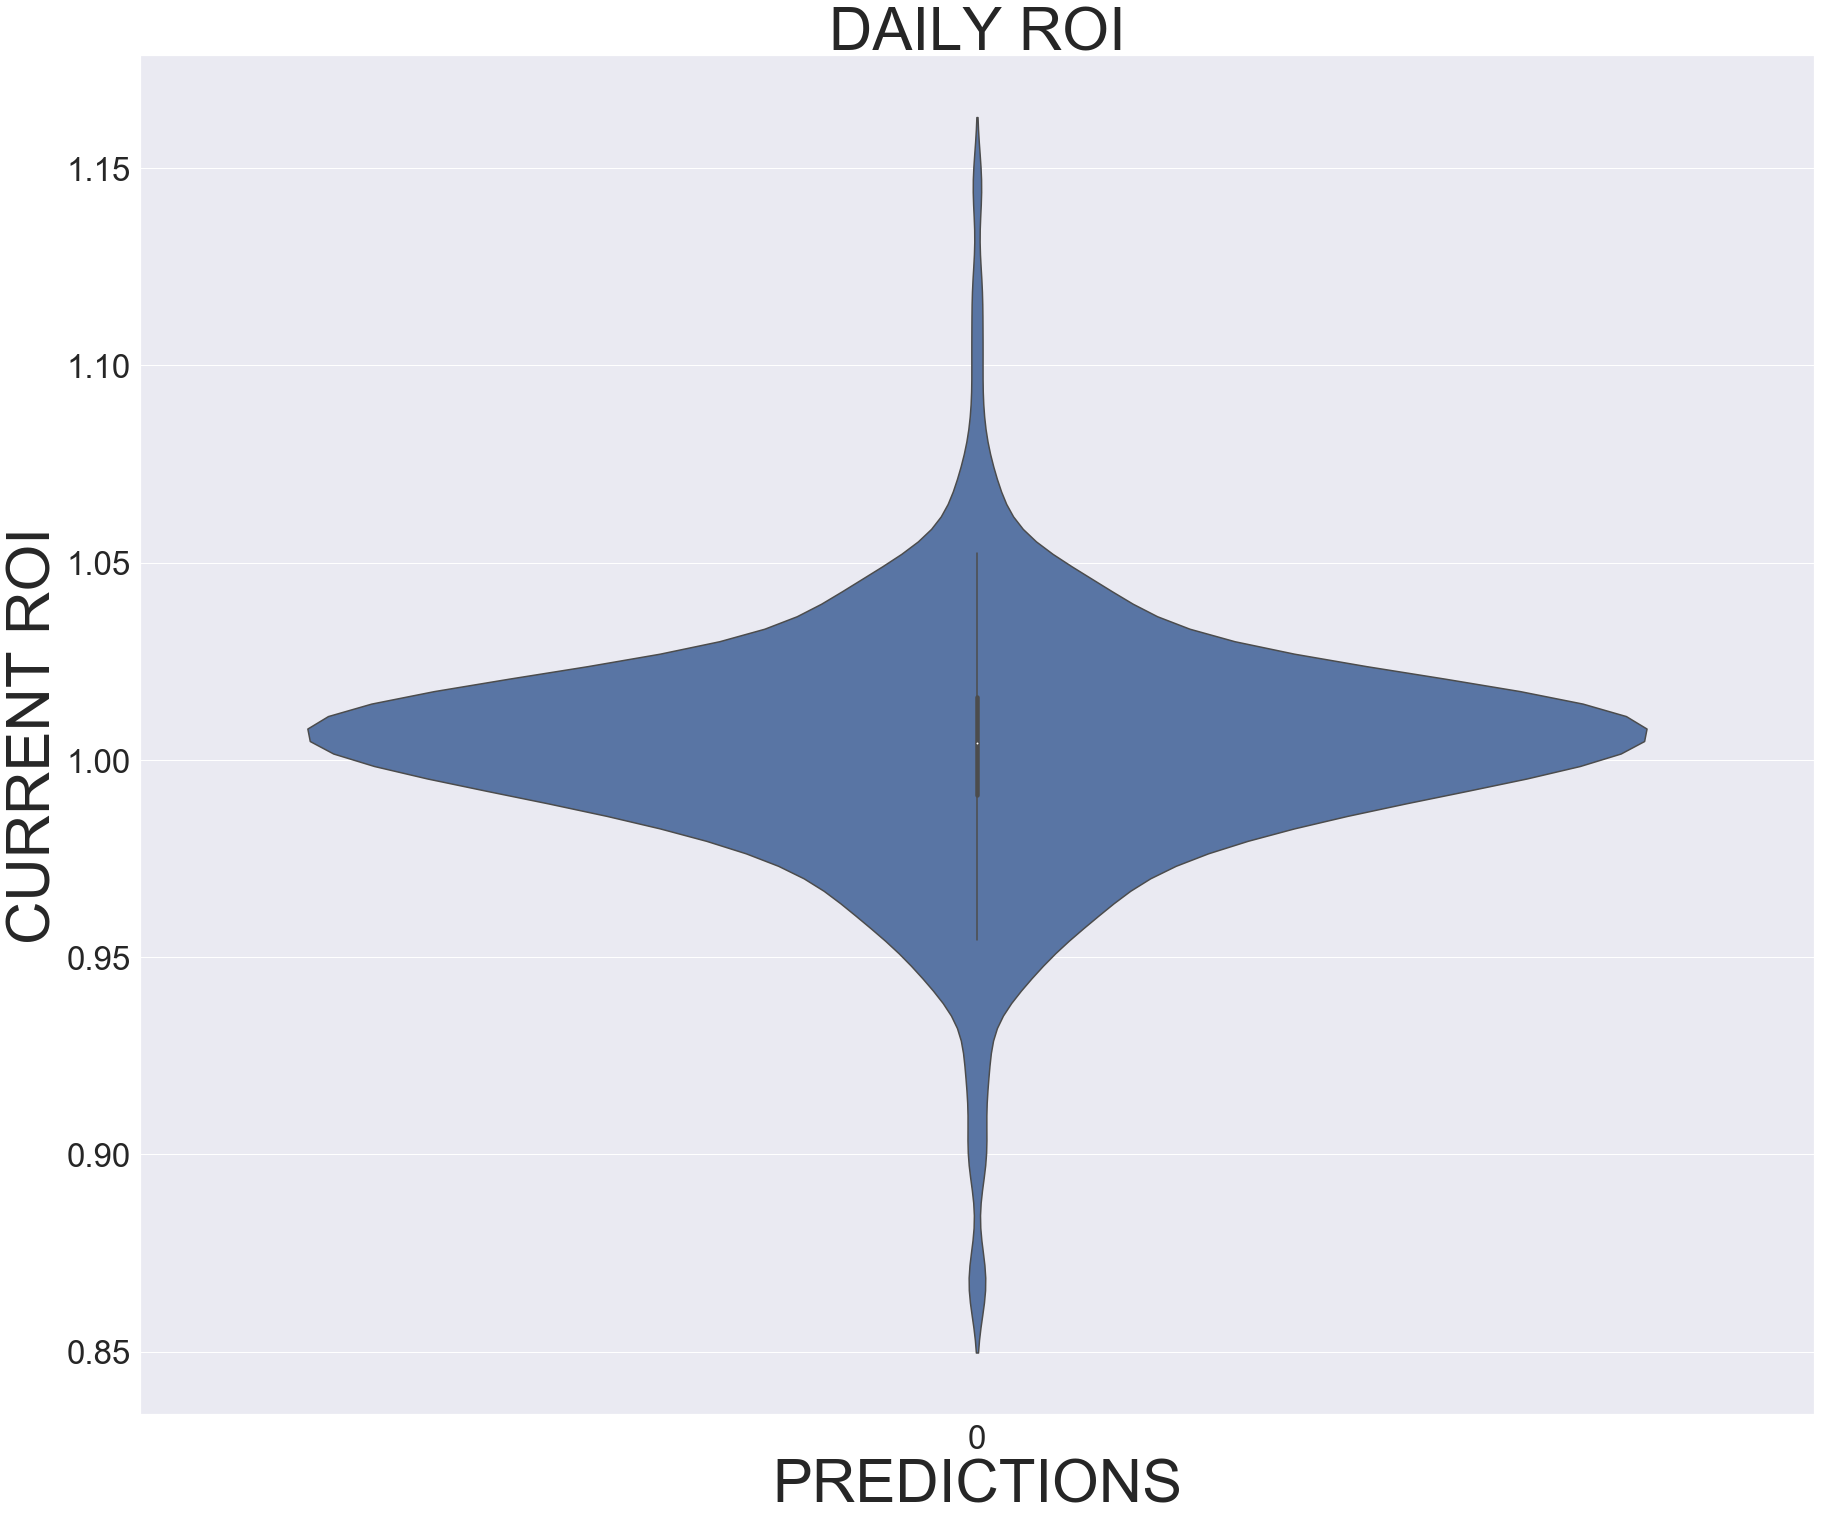

In [12]:
sns.set(font_scale=3)
plt.subplots(figsize=(30,25))
plt.title('DAILY ROI', fontsize=60);
ax = sns.violinplot( data=model_test["current_roi"])
ax.set_xlabel('PREDICTIONS',fontsize=60);
ax.set_ylabel('CURRENT ROI',fontsize=60);

In [13]:


adaB_prob=adaB.predict_proba(feature_test)
adaB_prob2=adaB.predict_proba(feature_train)
adaB_pred=adaB.predict(feature_test)
adaB_pred2=adaB.predict(feature_train)

rf2_prob=rf2.predict_proba(feature_test)
rf2_prob2=rf2.predict_proba(feature_train)
rf2_pred=rf2.predict(feature_test)
rf2_pred2=rf2.predict(feature_train)

In [14]:
#Train Sets
adaB_ensemble = pd.DataFrame(adaB_prob2,
                columns=['adaB1', 'adaB2', 'adaB3', 'adaB4'])
rf2_ensemble = pd.DataFrame(rf2_prob2,
                columns=['rf1', 'rf2', 'rf3', 'rf4'])
      



In [15]:
#Test sets
adaB_ensemble_t = pd.DataFrame(adaB_prob,
                columns=['adaB1', 'adaB2', 'adaB3', 'adaB4'])
rf2_ensemble_t = pd.DataFrame(rf2_prob,
                columns=['rf1', 'rf2', 'rf3', 'rf4'])

In [16]:

ensemble = adaB_ensemble.merge(rf2_ensemble,
                              left_index=True,
                              right_index=True)

feature_train = df_cln.loc[:stop,feats]
feature_train.reset_index(inplace=True,drop=True)
#feature_train.drop(labels='index')
ensemble = ensemble.merge(feature_train,
                          left_index=True,
                          right_index=True)



In [17]:

feature_test = df_cln.loc[stop:,feats]
feature_test.reset_index(inplace=True,drop=True)
feature_test.head()

r_sqr_60     tsf60  macd_diff  percent_down       obv   slope10      rsi60  \
0  0.877560  0.990159   0.010921           1.0  0.009747  0.106364  59.814138   
1  0.881784  0.986604   0.016931           1.0  0.010793  0.055798  60.356004   
2  0.883512  0.986300   0.022152           1.0  0.008464  0.025151  60.653445   
3  0.900030  0.981586   0.034425           1.0  0.011698  0.032869  61.204158   
4  0.900070  0.976703   0.049758           1.0  0.010743  0.074606  61.728476   

       rsi20     rsi200     ma200  macd_diff_hist   slope60    tsf200  
0  67.419372  54.614101  0.781764        0.742257  0.088937  0.945603  
1  68.925073  54.782423  0.775487        0.746490  0.090170  0.939363  
2  69.736684  54.875146  0.772865        0.752028  0.091248  0.937548  
3  71.209286  55.047503  0.766704        0.760634  0.094212  0.931366  
4  72.561977  55.212982  0.761084        0.773073  0.094812  0.925650

In [18]:


ensemble_t = adaB_ensemble_t.merge(rf2_ensemble_t,
                              left_index=True,
                              right_index=True)

ensemble_t = ensemble_t.merge(feature_test,
                          left_index=True,
                          right_index=True)




In [19]:
print(ensemble.shape,ensemble_t.shape)

(1558, 21) (389, 21)


In [20]:
feature_train = ensemble

feature_test = ensemble_t
    
#set my targets

target_train = df_cln.loc[:stop,[target_name]]
target_test = df_cln.loc[stop:,[target_name]]

adaB1 = AdaBoostClassifier(RandomForestClassifier(
                             n_estimators=1100,
                             random_state=42,
                             n_jobs=-1,
                             max_features=4,
                             max_depth=11,
                             criterion="gini"),
                         n_estimators=700,
                         random_state=42,
                         learning_rate=1)


# Train the classifier
adaB1.fit(feature_train, target_train)


target_pred=adaB1.predict(feature_test)
target_pred2=adaB1.predict(feature_train)

# #Import scikit-learn metrics module for accuracy calculation
# from sklearn import metrics
# # Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(target_test, target_pred),'\n'
      'Cohans Kappa:', metrics.cohen_kappa_score(target_test, target_pred),'\n'
      'Train ACC:', metrics.accuracy_score(target_train, target_pred2), '\n'
      "Confusion Matrix:",'\n',
      metrics.confusion_matrix(target_test, target_pred))




//anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:578: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Accuracy: 0.34704370179948585 
Cohans Kappa: 0.13686950748641624 
Train ACC: 1.0 
Confusion Matrix: 
 [[16 11 29 55]
 [10 14 36 36]
 [ 5 11 46 11]
 [11 10 29 59]]


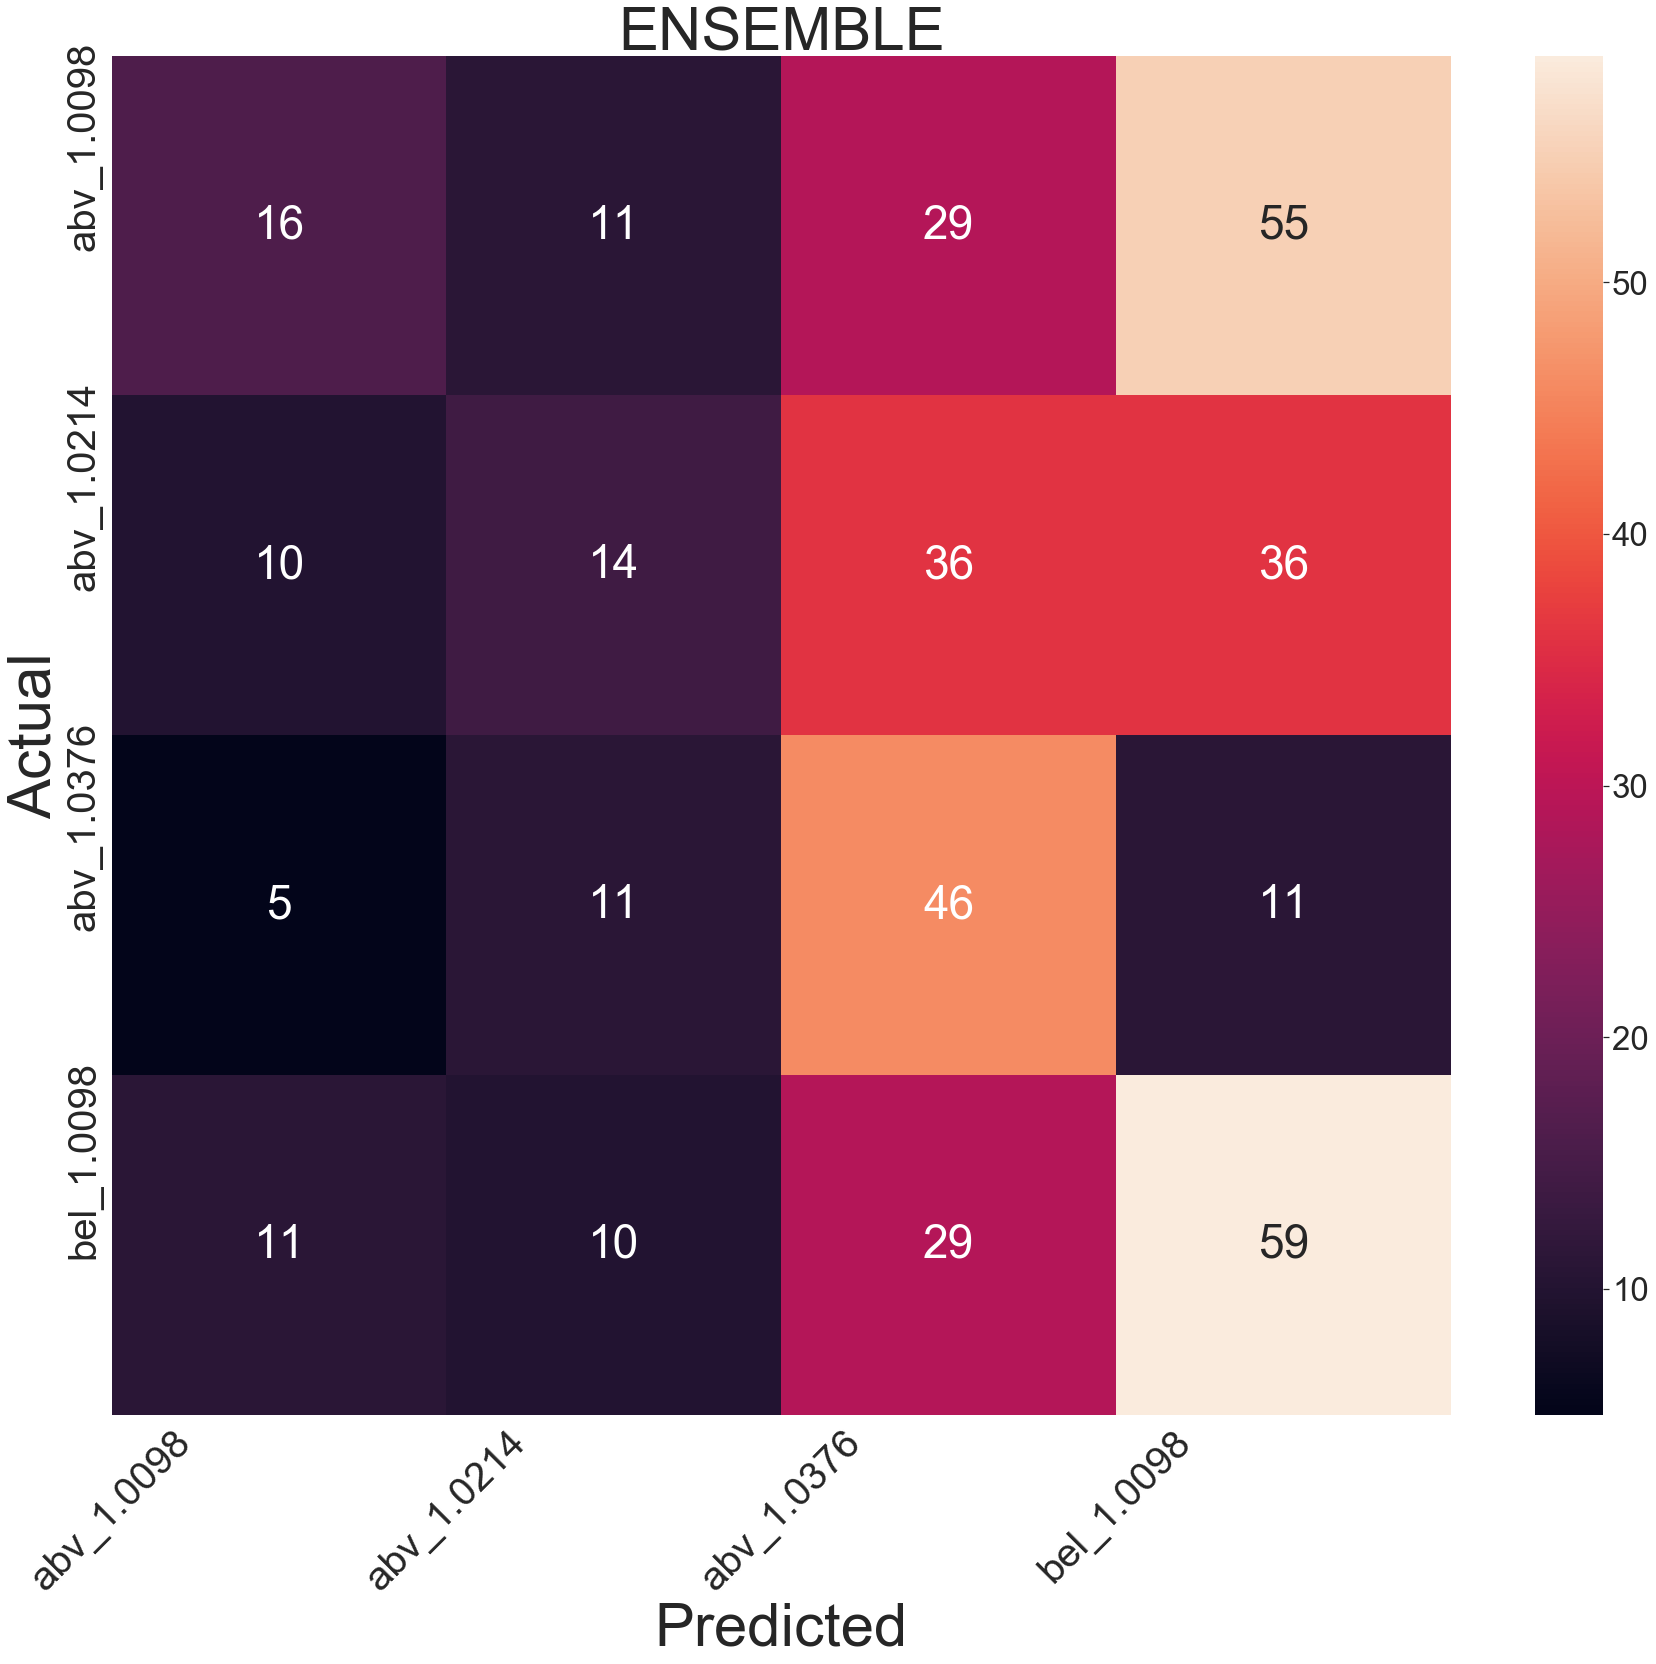

In [21]:
tar_true = target_test[target_name].values.tolist()

confusion_matrix = ConfusionMatrix(tar_true,target_pred)
matrix = metrics.confusion_matrix(target_test, target_pred)
type(confusion_matrix)
plt.subplots(figsize=(30,25))

ax =sns.heatmap(matrix, annot=True,annot_kws={"size": 46},fmt="d")# font size
tick_marks = np.arange(len(confusion_matrix.classes.values))
plt.xticks(tick_marks, confusion_matrix.classes.values, rotation=45, fontsize=40)
plt.yticks(tick_marks, confusion_matrix.classes.values, fontsize=40)
plt.xlabel( confusion_matrix.pred_name, fontsize=60)
plt.ylabel( confusion_matrix.true_name, fontsize=60)
plt.title('ENSEMBLE', fontsize=60)

//anaconda/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



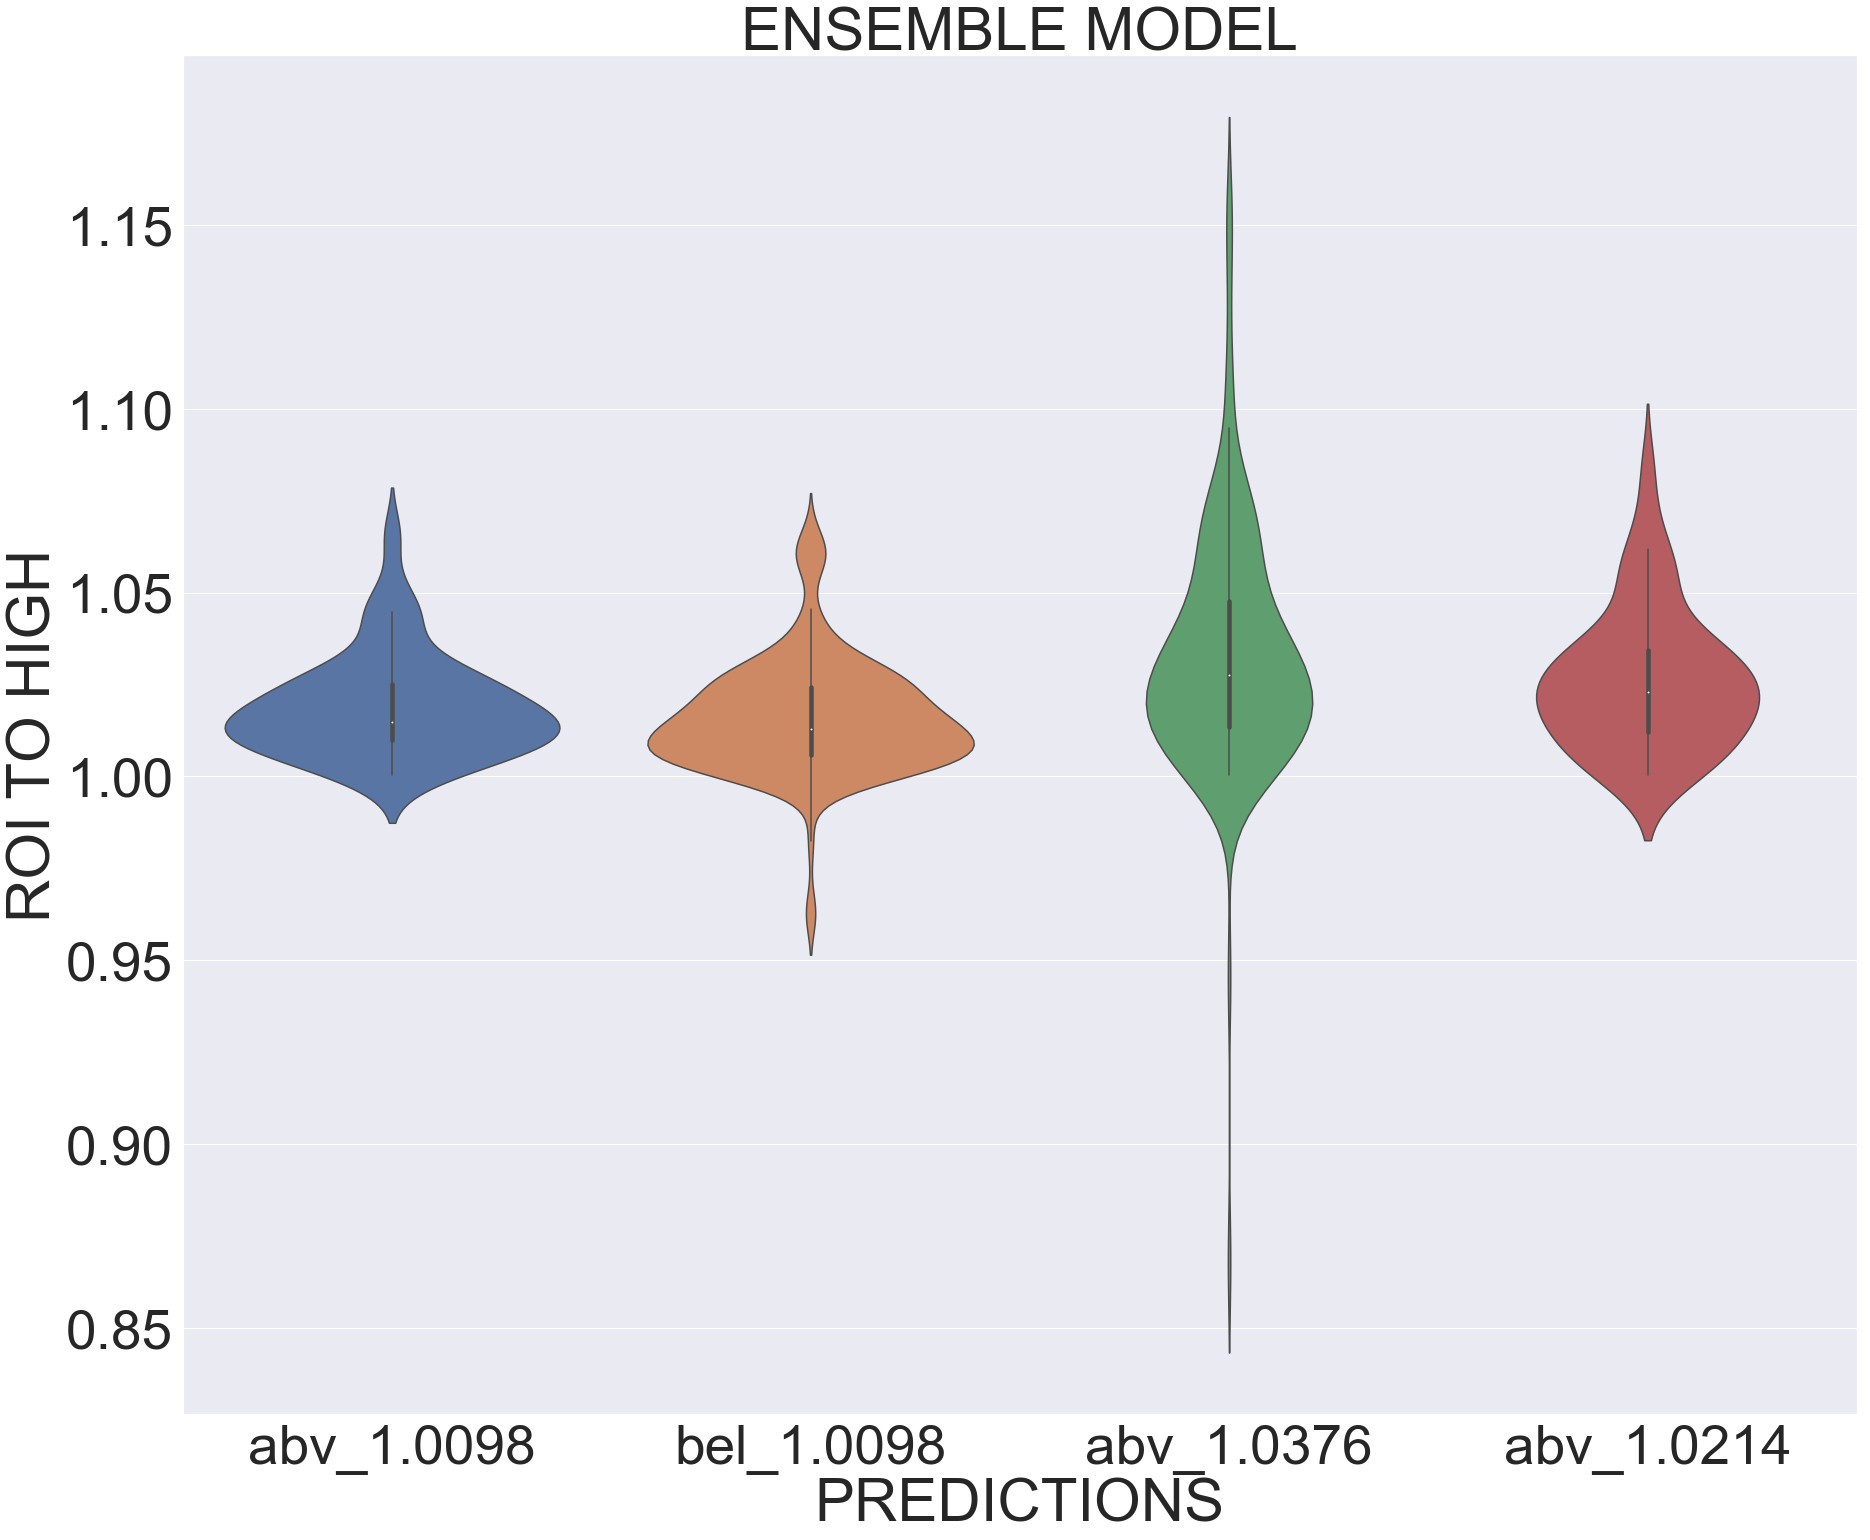

In [22]:
df_test = df_cln.loc[stop:,]
df_test.reset_index(inplace=True)
target_preds=pd.DataFrame(adaB1.predict(feature_test),columns=['prediction'])
model_test = df_test.merge(target_preds,
                              left_index=True,
                              right_index=True)


sns.set(font_scale=5)
plt.subplots(figsize=(30,25))
plt.title('ENSEMBLE MODEL', fontsize=60);
#sns.set(style="whitegrid")
ax = sns.violinplot(x="prediction", y="tar_1best_roi", data=model_test)
#ax = sns.violinplot(y='current_roi', data=model_test,palette="Set1")
ax.set_xlabel('PREDICTIONS',fontsize=60);
ax.set_ylabel('ROI TO HIGH',fontsize=60);


In [23]:
test = model_test[model_test['prediction'] != 'bel_1.0098']
mean(test['tar_1best_roi'])

1.0288706276982944

In [24]:
mean(model_test['current_roi'])

1.00287539271913

In [25]:
target_name = 'tar_1best_class'

feature_predict = df_cln.loc[stop:,]
df_new = feature_predict.reset_index(drop=True)
df_1 = pd.DataFrame(target_pred,columns=['preds'])
new =df_new.merge(df_1,left_index=True, right_index=True)
thresh = []
for x in new['preds'].unique():
    thresh.append(float(x[4:]))


thresh_min = min(thresh)
print(new['preds'].unique())

['abv_1.0098' 'bel_1.0098' 'abv_1.0376' 'abv_1.0214']


In [26]:
thresh.sort()
Q1 = thresh[1]
Q2 = thresh[2]
Q3 = thresh[3]

In [27]:
end = new.shape[0]

n=.5
p=.99
while n > .01:
    counter = 0
    
    for i in range(end):
        low = 1 + (new['Low'][i] - new['Open'][i])/new['Open'][i]
        high = 1 + (new['High'][i] - new['Open'][i])/new['Open'][i]
        if low <= p and high > Q3:
            counter+=1
    p -=.001
    n = (counter/end)
print(p,n)

0.973 0.007712082262210797


In [38]:
end = new.shape[0]

array_p = []
rate_arr =[]
max_arr = []
opt_thresh = []
# counter = 0
# counter2 = 0
prob = 0.5
base = new['Open'][0]
n = 0
cnt =0
count = 0
counter = 0
counter2 = 0
risk = n
Q_1 = 'bel_' + str(thresh)

while n < (end-1):
    if new['preds'][n] != Q_1:
        high = 1 + (new['High'][n]-new['Open'][n])/new['Open'][n]
        next_morn = 1 + (new['Open'][n+1]-new['Open'][n])/new['Open'][n]
        roi_day = max(high,next_morn)
        rand = random()
        rand2 = random()
        
        if roi_day > Q3:
            base*=Q3
                
        else:
            
            if roi_day > Q1:
                base*=Q1
            else:
                base*=max(new['current_roi'][n],risk)
      
        array_p.append(base)
    else:
        array_p.append(base)
    n+=1  
    #print(n)
       
         
        
print('investment: ',base,'\n',
      'Simply hold: ',new['Open'].iloc[-1],'\n')   
    
# print('Time in market:', end, '\n',
#       'counter: ', counter, '\n',
#       'Ending Investment: $', base, '\n',
#        'Starting Price/Investment: $',new['Open'][0],'\n',
#        'Ending Price: $',new['Open'][end-1],'\n',
      
#         round(100*counter/end,2), '% time in market')

investment:  74.45561791748014 
 Simply hold:  65.339996 



In [39]:
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, plot
import plotly

import pandas as pd

init_notebook_mode()

#df = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/finance-charts-apple.csv")

trace_high = go.Scatter(
    x=new['Date'],
    y=new['Open'][0:end],
    name = name,
    line = dict(color = '#17BECF'),
    opacity = 0.8)

trace_low = go.Scatter(
    x=new['Date'],
    y=array_p,
    name = "My_algo",
    line = dict(color = '#7F7F7F'),
    opacity = 0.8)

data = [trace_high,trace_low]

layout = dict(
    title='My Predictor vs Holding '+ name,
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1,
                     label='1m',
                     step='day',
                     stepmode='backward'),
                dict(count=6,
                     label='6m',
                     step='day',
                     stepmode='backward'),
                dict(step='all')
            ])
        ),
        rangeslider=dict(
            visible = True
        ),
        type='date'
    )
)

fig = dict(data=data, layout=layout)
plotly.offline.iplot(fig)
# if not os.path.exists('images'):
#     os.mkdir('images')
# pio.write_image(fig, 'images/NFLX_algo.png')

//anaconda/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



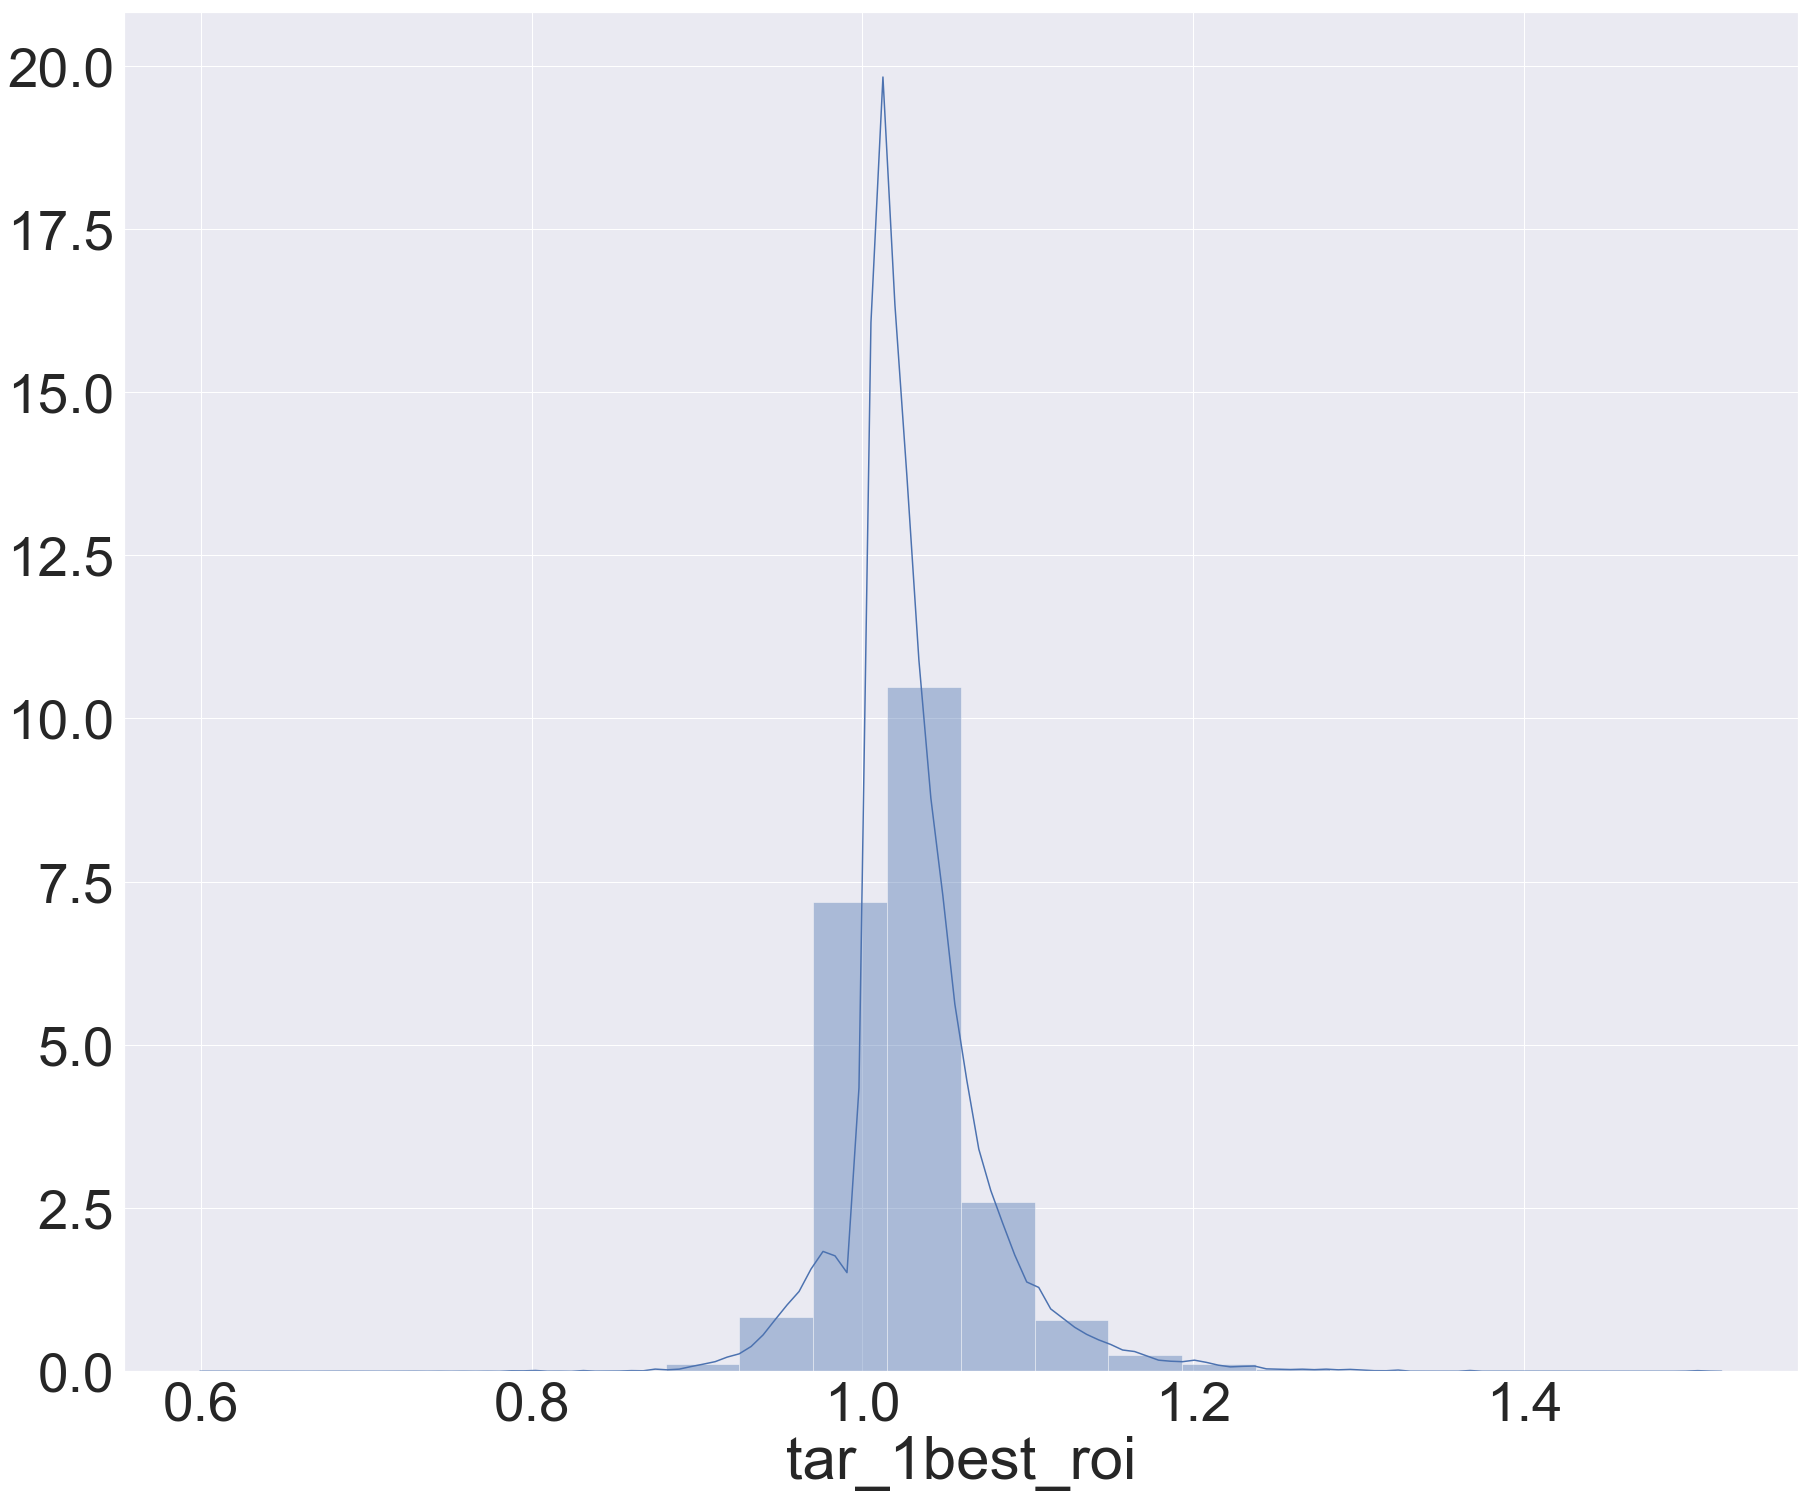

In [40]:
test_df = AMD[AMD['percent_down'] < .9]
plt.subplots(figsize=(30,25))
sns.distplot(test_df['tar_1best_roi'],bins=20)


In [41]:
mean(test_df['tar_3best_roi'])

1.0491061594795839

In [42]:
mean(AMD['tar_3best_roi'])

1.0491170410464332

In [43]:
80000*1.63**8

3986491.314544967

In [44]:
5000*.2

1000.0

In [46]:
TQQQ.columns.values

array(['Unnamed: 0', 'index', 'Date', 'Open', 'High', 'Low', 'Close',
       'Adj Close', 'Volume', 'Day_previous_roi', 'current_roi', 'ma10',
       'ma_chg10', 'rsi10', 'rsi_chg10', 'tsf10', 'ma20', 'ma_chg20',
       'rsi20', 'rsi_chg20', 'tsf20', 'ma60', 'ma_chg60', 'rsi60',
       'rsi_chg60', 'tsf60', 'ma200', 'ma_chg200', 'rsi200', 'rsi_chg200',
       'tsf200', 'macd', 'macdsignal', 'macdhist', 'aroondown', 'aroonup',
       'obv', 'shawman', 'hammer', 'sine', 'leadsine', 'macd_diff',
       'macd_diff_hist', 'aroon_diff', 'open_H_ratio', 'open_L_ratio',
       'close_H_ratio', 'close_L_ratio', 'slope3', 'r_sqr_3', 'slope5',
       'r_sqr_5', 'slope10', 'r_sqr_10', 'slope60', 'r_sqr_60', 'stDev20',
       'percent_down', 'semi_pk_pr', 'up_dwn_prev', 'up_dwn_curr',
       'target_1roi', 'target_3roi', 'target_5roi', 'target_10roi',
       'target_20roi', 'tar_1best_roi', 'tar_3best_roi', 'tar_5best_roi',
       'tar_10best_roi', 'tar_20best_roi', 'tar_1best_class',
       'tar_3